In [72]:
#import Libs
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt
import seaborn as sns
import matplotx
plt.style.use(matplotx.styles.dracula)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data
df = pd.read_csv('./Data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#check duplicates
df.duplicated().sum()

0

In [4]:
# data describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


<AxesSubplot:xlabel='balance', ylabel='Density'>

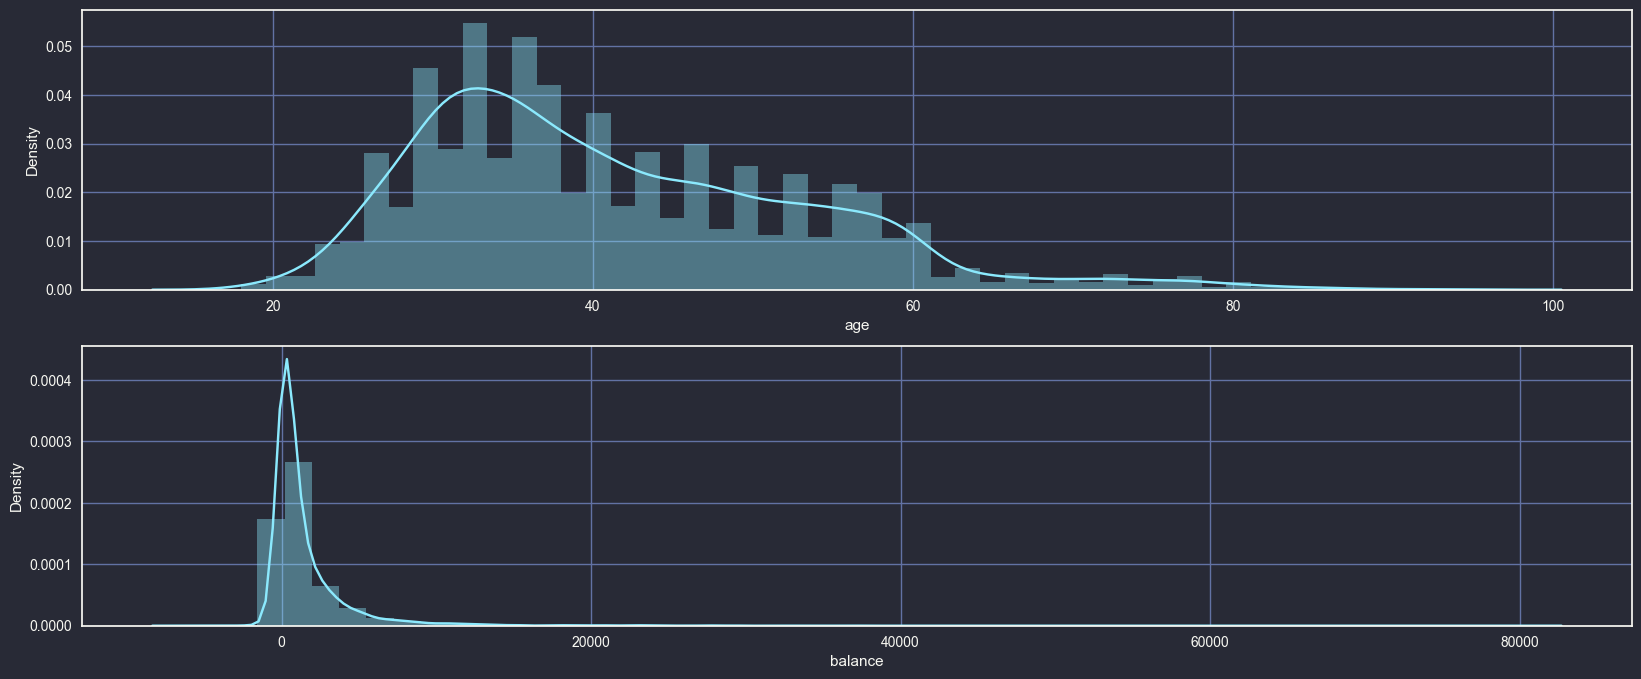

In [5]:
#Check Distribution
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,8))
sns.distplot(df['age'], ax=ax1)
sns.distplot(df['balance'], ax=ax2)


In [6]:
df2=df[["age","balance"]]

Text(0, 0.5, 'Balance')

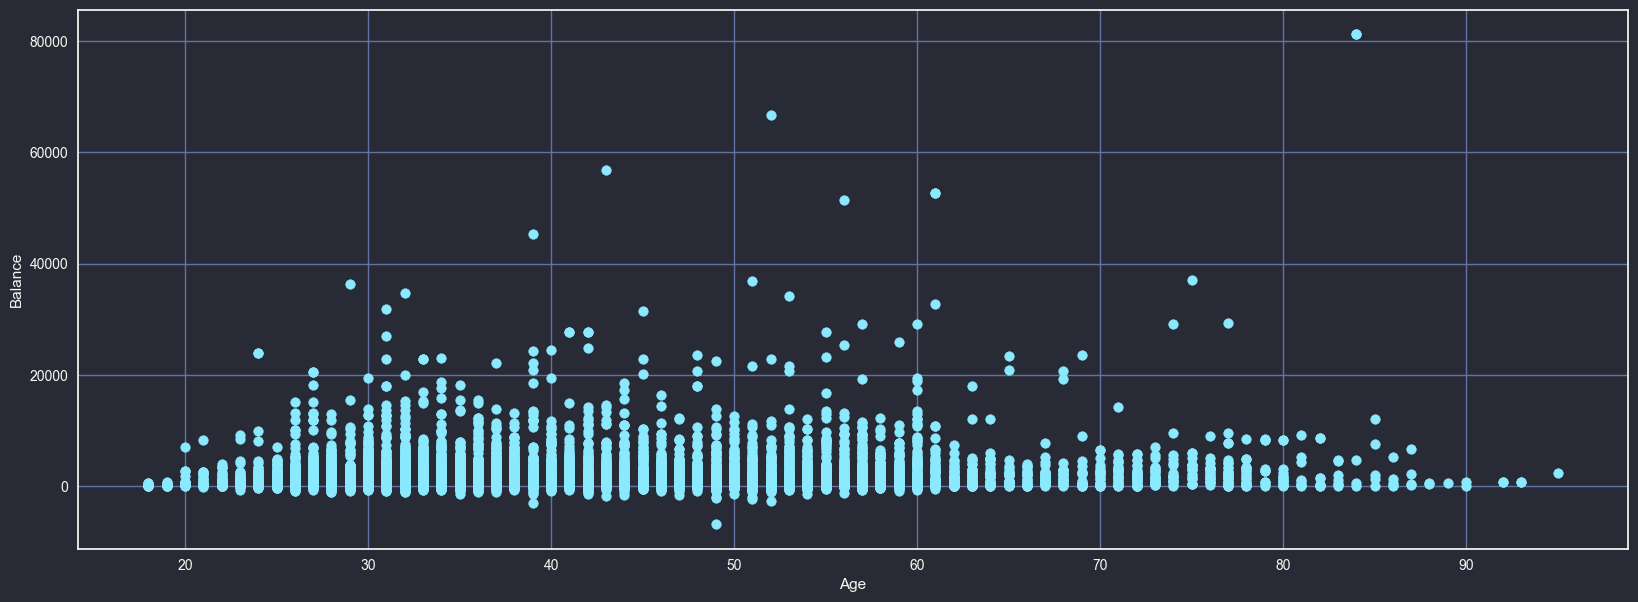

In [7]:
plt.figure(figsize = (20,7))

plt.scatter(df2.age,df2['balance'])
plt.xlabel('Age')
plt.ylabel('Balance')

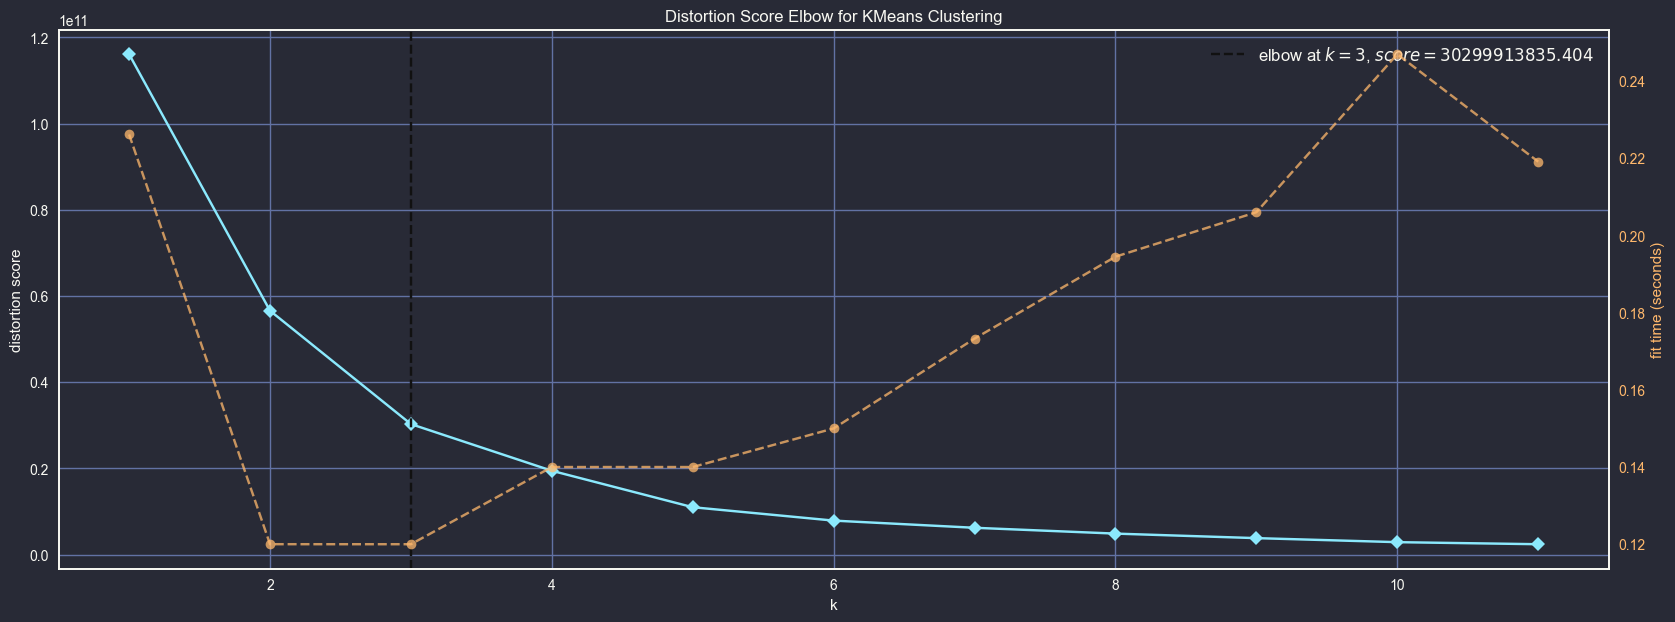

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
#Elbow For Kmeans clustering
model = KMeans()
plt.figure(figsize = (20,7))
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df2[['age','balance']])        # Fit the data to the visualizer
visualizer.show() 

<Figure size 2000x700 with 0 Axes>

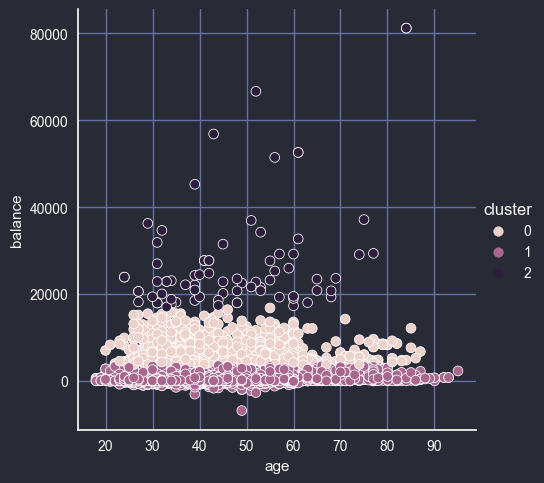

In [10]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df2[['age','balance']])
df2['cluster'] = clusters
plt.figure(figsize = (20,7))
sns.relplot(x='age', y='balance', hue='cluster', data=df2)

In [11]:
df2

,age,balance,cluster
0,59,2343,1
1,56,45,1
2,41,1270,1
3,55,2476,1
4,54,184,1
...,...,...,...
11157,33,1,1
11158,39,733,1
11159,32,29,1
11160,43,0,1


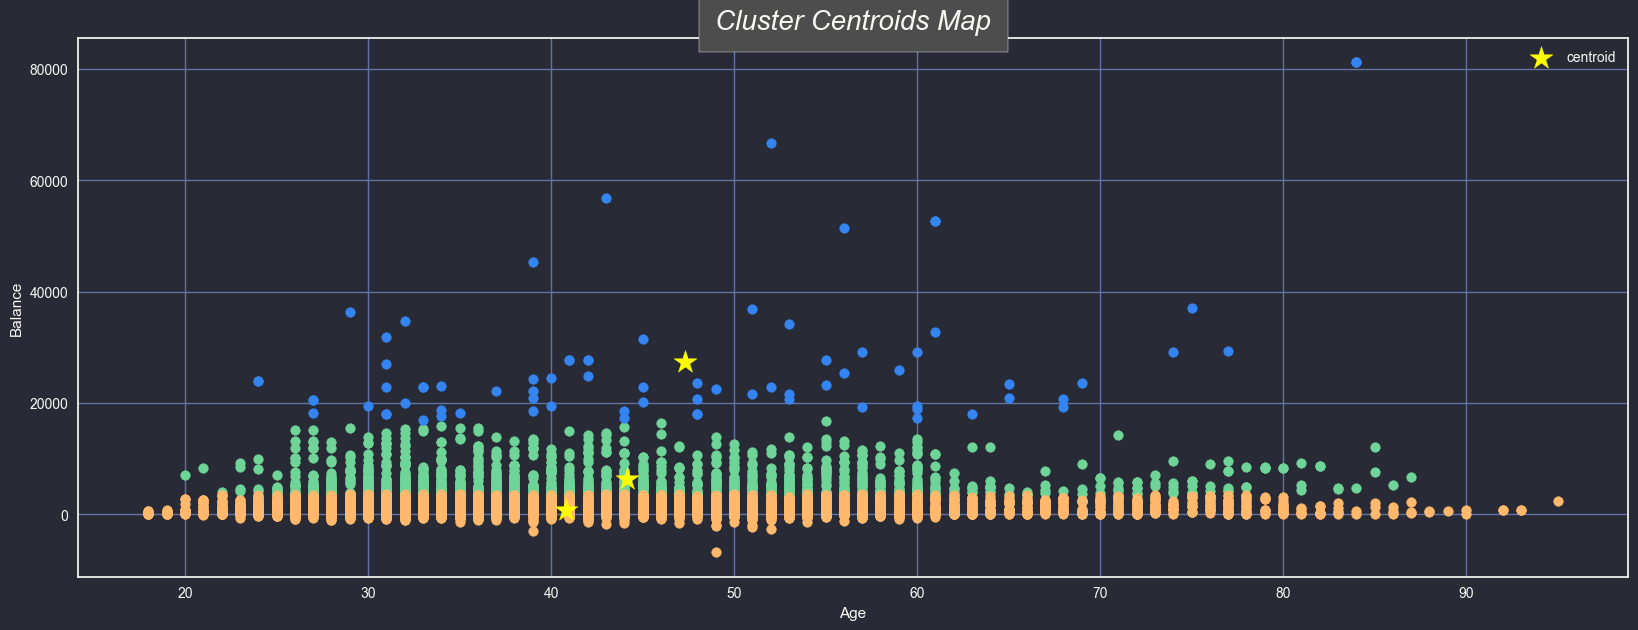

In [12]:
N_df1 = df2[df2.cluster==0]
N_df2 = df2[df2.cluster==1]
N_df3 = df2[df2.cluster==2]
plt.figure(figsize = (20,7))
plt.scatter(N_df1.age,N_df1['balance'],color='#6fd498')
plt.scatter(N_df2.age,N_df2['balance'],color='#ffb86c')
plt.scatter(N_df3.age,N_df3['balance'],color='#3484f1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='yellow',marker='*',label='centroid',s=300)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("Cluster Centroids Map",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")

plt.legend()

In [63]:
#labeling Clusters
levels = {0: 'Medium financial level', 2: 'High financial level', 1: 'Poor financial level'}
df2['financial level'] = df2['cluster'].map(lambda x: levels[x])

In [64]:
df2

,age,balance,cluster,financial level
0,59,2343,1,Poor financial level
1,56,45,1,Poor financial level
2,41,1270,1,Poor financial level
3,55,2476,1,Poor financial level
4,54,184,1,Poor financial level
...,...,...,...,...
11157,33,1,1,Poor financial level
11158,39,733,1,Poor financial level
11159,32,29,1,Poor financial level
11160,43,0,1,Poor financial level


In [65]:
df2["financial level"].value_counts()

Poor financial level      9882
Medium financial level    1203
High financial level        77
Name: financial level, dtype: int64

In [66]:
df2["cluster"].value_counts()

1    9882
0    1203
2      77
Name: cluster, dtype: int64

In [67]:
df2[df2.cluster==0].min(),df2[df2.cluster==0].max()

(age                                    20
 balance                              3552
 cluster                                 0
 financial level    Medium financial level
 dtype: object,
 age                                    87
 balance                             16786
 cluster                                 0
 financial level    Medium financial level
 dtype: object)

Text(0.5, 1.0, 'Bank Customers Segmentation')

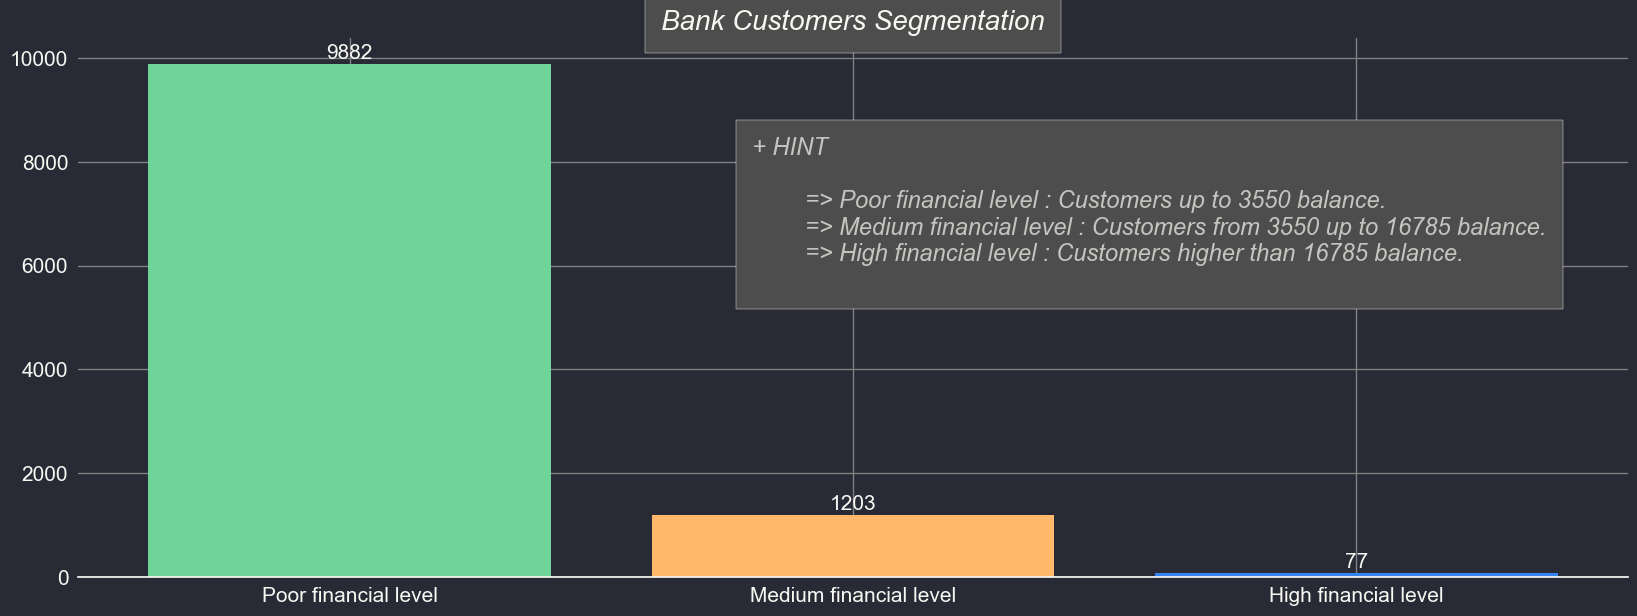

In [71]:
#plot customers clusters
plt.figure(figsize = (20,7)) 

ed_plot=plt.bar(x=df2["financial level"].value_counts().index,height=df2["financial level"].value_counts(),color=["#6fd498","#ffb86c","#3484f1"])

for bar in ed_plot.patches:
    plt.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=15,
                  xytext=(0, 8),
                  textcoords='offset points')
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid(linestyle="-",color='gray')
sns.despine(top=True, right=True, left=True, bottom=False)

txt = '''+ HINT

        => Poor financial level : Customers up to 3550 balance.
        => Medium financial level : Customers from 3550 up to 16785 balance.
        => High financial level : Customers higher than 16785 balance.
'''

plt.text(.8,50**2.205,txt,alpha=0.7,fontsize=17,fontstyle="italic",bbox={'facecolor':'0.3', 'pad':12})

plt.title("Bank Customers Segmentation",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")